In [1]:
fineweb_datasets = [
    ("fineweb/CC-MAIN-2023-50", 299918912908),
    ("fineweb/CC-MAIN-2023-40", 234577593868),
    ("fineweb/CC-MAIN-2023-23", 159795454845),
    ("fineweb/CC-MAIN-2023-14", 124908970667),
    ("fineweb/CC-MAIN-2023-06", 91084249541),
    ("fineweb/CC-MAIN-2022-49", 84783043327),
    ("fineweb/CC-MAIN-2022-27", 74920986479),
    ("fineweb/CC-MAIN-2022-33", 73033112530),
    ("fineweb/CC-MAIN-2022-05", 61205145838),
]

In [2]:
fineweb_total_tokens = sum([x for _, x in fineweb_datasets])

### Data distribution based on token count

In [3]:
# source: https://huggingface.slack.com/archives/C06F8VDSF37/p1708173629417409?thread_ts=1708035008.026629&cid=C06F8VDSF37
datasets = [
    ("stack_full", 300006286251),
    ("fineweb", fineweb_total_tokens),
    ("c4", 174635677947),
    ("arxiv", 30328913436),
    ("synthetic-data", 28596897142),
    ("stack-pull-requests", 20341817979),
    ("stack-jupyter-scripts", 16944691904),
    ("stack-jupyter-structured", 15298112220),
    ("open-web-math", 14011668716),
    ("stack-issues", 11380942372),
    ("stackoverflow", 10370972771),
    ("wikipedia", 5341954858),
    ("project-gutenberg", 4953685397),
    ("deepmind-math", 4837141843),
    ("stack-kaggle-scripts", 1726142721),
    ("stack-documentation", 1656392322),
]

# Convert to a dictionary
dataset_dict = {name: tokens for name, tokens in datasets}

dataset_dict

{'stack_full': 300006286251,
 'fineweb': 1204227470003,
 'c4': 174635677947,
 'arxiv': 30328913436,
 'synthetic-data': 28596897142,
 'stack-pull-requests': 20341817979,
 'stack-jupyter-scripts': 16944691904,
 'stack-jupyter-structured': 15298112220,
 'open-web-math': 14011668716,
 'stack-issues': 11380942372,
 'stackoverflow': 10370972771,
 'wikipedia': 5341954858,
 'project-gutenberg': 4953685397,
 'deepmind-math': 4837141843,
 'stack-kaggle-scripts': 1726142721,
 'stack-documentation': 1656392322}

In [4]:
total_num_tokens = sum([x for x in dataset_dict.values()])

In [5]:
total_num_tokens

1844658767882

In [6]:
weights = {name: num_tokens / total_num_tokens for name, num_tokens in dataset_dict.items()}

In [7]:
weights

{'stack_full': 0.16263511250672186,
 'fineweb': 0.6528185542877774,
 'c4': 0.09467099334990459,
 'arxiv': 0.0164414763120786,
 'synthetic-data': 0.01550254043723999,
 'stack-pull-requests': 0.011027415115022095,
 'stack-jupyter-scripts': 0.009185813766226018,
 'stack-jupyter-structured': 0.00829319356314609,
 'open-web-math': 0.0075958052296511815,
 'stack-issues': 0.006169673529954469,
 'stackoverflow': 0.005622163270287513,
 'wikipedia': 0.0028959040831890684,
 'project-gutenberg': 0.0026854210021118007,
 'deepmind-math': 0.00262224207925128,
 'stack-kaggle-scripts': 0.0009357517775398223,
 'stack-documentation': 0.0008979396898982224}

### Downsample fineweb and distribute the rest

In [8]:
from copy import deepcopy

In [9]:
reference_weights = deepcopy(weights)

In [10]:
reference_weights["fineweb"] = 0.1

In [11]:
remaining_weight_per_dataset = (1 - sum([x for x in reference_weights.values()])) / (len(reference_weights.keys()) - 1)

In [12]:
remaining_weight_per_dataset

0.03685457028585183

In [13]:
for name, w in weights.items():
    if name != "fineweb":
        reference_weights[name] += remaining_weight_per_dataset

In [14]:
sum(weights.values())

1.0

In [15]:
for name, w in reference_weights.items():
    print(name, w)

stack_full 0.19948968279257367
fineweb 0.1
c4 0.1315255636357564
arxiv 0.05329604659793043
synthetic-data 0.05235711072309182
stack-pull-requests 0.047881985400873926
stack-jupyter-scripts 0.046040384052077846
stack-jupyter-structured 0.04514776384899792
open-web-math 0.044450375515503016
stack-issues 0.0430242438158063
stackoverflow 0.042476733556139346
wikipedia 0.0397504743690409
project-gutenberg 0.039539991287963636
deepmind-math 0.039476812365103114
stack-kaggle-scripts 0.037790322063391654
stack-documentation 0.037752509975750054


### Tuned weights

In [16]:
import torch

In [17]:
doremi_weights = torch.tensor([0.1420, 0.0305, 0.1831, 0.0302, 0.0711, 0.1613, 0.0134, 0.0568, 0.0584,
        0.0295, 0.0508, 0.0505, 0.0479, 0.0047, 0.0301, 0.0397])

In [45]:
names = [
    "fineweb", "stack_full", "c4", "arxiv", "synthetic-data", "stack-pull-requests",
    "stack-jupyter-scripts", "stack-jupyter-structured", "open-web-math",
    "stack-issues", "stackoverflow", "wikipedia", "project-gutenberg", "deepmind-math",
    "stack-kaggle-scripts", "stack-documentation"
]

In [46]:
for name, weight in zip(names, doremi_weights):
    print(name, weight)

fineweb tensor(0.1420)
stack_full tensor(0.0305)
c4 tensor(0.1831)
arxiv tensor(0.0302)
synthetic-data tensor(0.0711)
stack-pull-requests tensor(0.1613)
stack-jupyter-scripts tensor(0.0134)
stack-jupyter-structured tensor(0.0568)
open-web-math tensor(0.0584)
stack-issues tensor(0.0295)
stackoverflow tensor(0.0508)
wikipedia tensor(0.0505)
project-gutenberg tensor(0.0479)
deepmind-math tensor(0.0047)
stack-kaggle-scripts tensor(0.0301)
stack-documentation tensor(0.0397)


### Visualize

In [47]:
doremi_weights

tensor([0.1420, 0.0305, 0.1831, 0.0302, 0.0711, 0.1613, 0.0134, 0.0568, 0.0584,
        0.0295, 0.0508, 0.0505, 0.0479, 0.0047, 0.0301, 0.0397])

In [48]:
reference_weights = torch.tensor([reference_weights[name] for name in names])

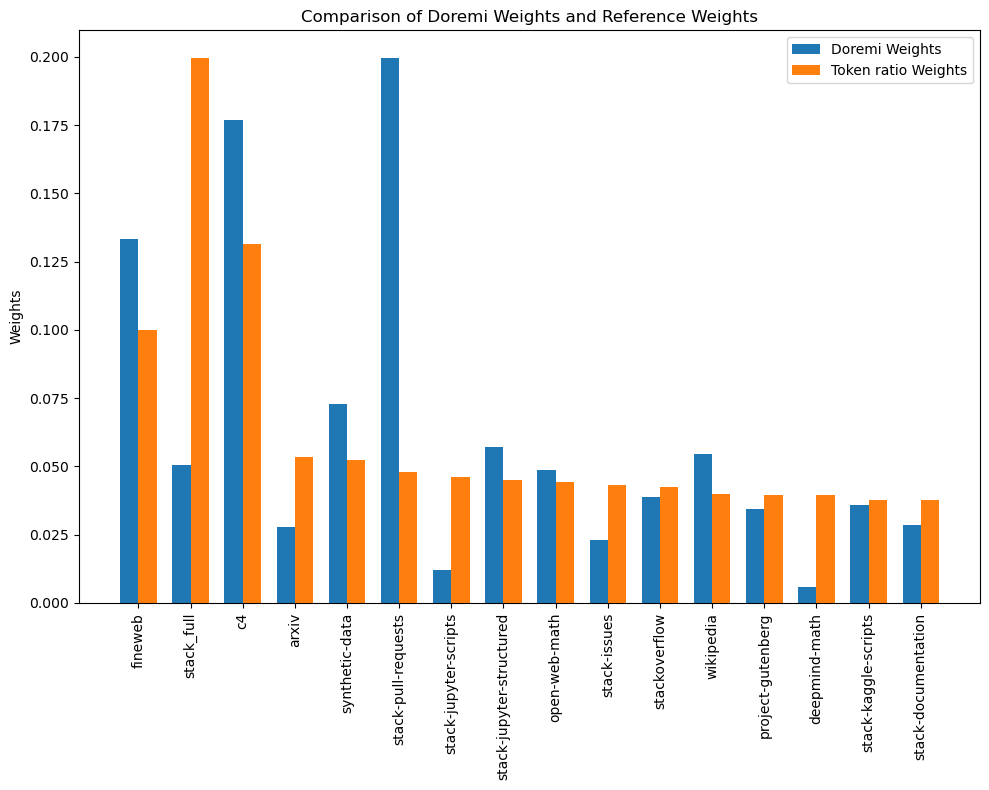

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Setting the positions and width for the bars
positions = np.arange(len(names))
width = 0.35

# Plotting both the doremi_weights and reference_weights
plt.figure(figsize=(10, 8))
plt.bar(positions - width/2, doremi_weights, width, label='Doremi Weights')
plt.bar(positions + width/2, reference_weights, width, label='Token ratio Weights')

plt.ylabel('Weights')
plt.title('Comparison of Doremi Weights and Reference Weights')
plt.xticks(positions, names, rotation='vertical')
plt.legend()

plt.tight_layout()
plt.show()

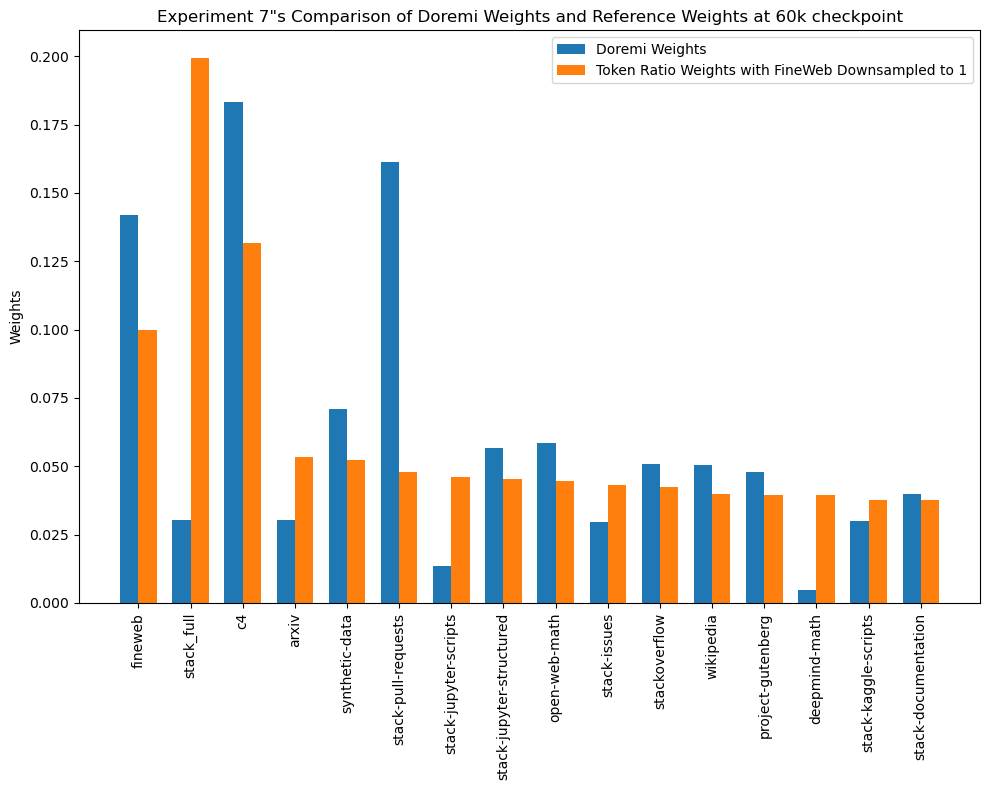

In [53]:
import matplotlib.pyplot as plt
import numpy as np

# Setting the positions and width for the bars
positions = np.arange(len(names))
width = 0.35

# Plotting both the doremi_weights and reference_weights
plt.figure(figsize=(10, 8))
plt.bar(positions - width/2, doremi_weights, width, label='Doremi Weights')
plt.bar(positions + width/2, reference_weights, width, label='Token Ratio Weights with FineWeb Downsampled to 1')

plt.ylabel('Weights')
plt.title('Experiment 7"s Comparison of Doremi Weights and Reference Weights at 60k checkpoint')
plt.xticks(positions, names, rotation='vertical')
plt.legend()

plt.tight_layout()
plt.show()